# Data Import and Setup


In [ ]:
# RQ2 NOTEBOOK: SWING VS SAFE STATES ANALYSIS - HOUSE ONLY
# Cell 0: Setup, Data Loading, and State Classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Set display options
pd.set_option('display.max_columns', 50)
sns.set_style("whitegrid")

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Load data
file_path = '/content/drive/MyDrive/congress_data/final_merged_analysis.csv'

try:
    df = pd.read_csv(file_path)
    print("\nData loaded successfully!")
except FileNotFoundError:
    print(f"ERROR: File not found at: {file_path}")
    raise

# Define column names
DATE_COL = 'date'
PARTY_COL = 'party'
SENTIMENT_COL = 'final_sentiment_label'
TOPIC_COL = 'topic'
STATE_COL = 'state_abbrev'
CHAMBER_COL = 'chamber'

# Clean sentiment column
df[SENTIMENT_COL] = pd.to_numeric(df[SENTIMENT_COL], errors='coerce')
df.dropna(subset=[SENTIMENT_COL], inplace=True)
df[SENTIMENT_COL] = df[SENTIMENT_COL].astype(int)

print(f"\nTotal rows after cleaning: {len(df)}")

# --- FILTER TO HOUSE ONLY ---
print(f"\nBefore chamber filtering: {len(df)} speeches")
print(f"Chamber distribution:\n{df[CHAMBER_COL].value_counts()}")

df_house = df[df[CHAMBER_COL] == 'House'].copy()

print(f"\n*** FILTERED TO HOUSE ONLY ***")
print(f"After chamber filtering: {len(df_house)} speeches")
print(f"Sentiment distribution in House speeches:\n{df_house[SENTIMENT_COL].value_counts()}")

# --- UPDATED SWING VS SAFE STATE CLASSIFICATION (6-5-11) ---

# 6 Swing states
SWING_STATES = ['FL', 'OH', 'PA', 'MI', 'GA', 'VA']

# 5 Safe Democratic states
SAFE_DEM_STATES = ['CA', 'NY', 'IL', 'NJ', 'MA']

# 11 Safe Republican states
SAFE_REP_STATES = ['TX', 'IN', 'TN', 'SC', 'MO', 'LA', 'KY', 'AL', 'MS', 'AR', 'KS']

# Classify states
def classify_state(state_abbrev):
    if state_abbrev in SWING_STATES:
        return 'Swing'
    elif state_abbrev in SAFE_DEM_STATES:
        return 'Safe-Dem'
    elif state_abbrev in SAFE_REP_STATES:
        return 'Safe-Rep'
    else:
        return 'Other'

df_house['state_type'] = df_house[STATE_COL].apply(classify_state)

# --- FILTER TO ONLY INCLUDE ANALYZED STATES (EXCLUDE 'Other') ---
print(f"\nBefore state filtering: {len(df_house)} total House speeches")
df_analysis = df_house[df_house['state_type'] != 'Other'].copy()
print(f"After filtering to 22 analyzed states: {len(df_analysis)} House speeches")

# Print state classification results
print("\n" + "="*80)
print("STATE CLASSIFICATION RESULTS (HOUSE ONLY) - UPDATED 6-5-11 SELECTION")
print("="*80)
print(df_analysis['state_type'].value_counts())
print(f"\nSwing states (6): {SWING_STATES}")
print(f"Safe-Dem states (5): {SAFE_DEM_STATES}")
print(f"Safe-Rep states (11): {SAFE_REP_STATES}")
print(f"\nAll other states and Senate speeches excluded from analysis")

# Show distribution by state type
print("\n--- SPEECH DISTRIBUTION BY STATE TYPE (HOUSE ONLY) ---")
state_type_dist = df_analysis['state_type'].value_counts()
state_type_pct = (state_type_dist / len(df_analysis) * 100).round(2)
for state_type in ['Swing', 'Safe-Dem', 'Safe-Rep']:
    count = state_type_dist.get(state_type, 0)
    pct = state_type_pct.get(state_type, 0)
    print(f"{state_type}: {count:,} speeches ({pct}%)")

# Show distribution by state within each type
print("\n--- SPEECH DISTRIBUTION BY INDIVIDUAL STATES (HOUSE ONLY) ---")
for state_type_name, state_list in [('Swing', SWING_STATES),
                                      ('Safe-Dem', SAFE_DEM_STATES),
                                      ('Safe-Rep', SAFE_REP_STATES)]:
    print(f"\n{state_type_name} States:")
    state_counts = df_analysis[df_analysis['state_type'] == state_type_name][STATE_COL].value_counts()
    for state in state_list:
        count = state_counts.get(state, 0)
        print(f"  {state}: {count:,}")

print("\n" + "="*80)
print("Cell 0 complete - House speeches loaded, states classified, filtered to 22 states!")
print("="*80)


Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3606014958.py:22: DtypeWarning: Columns (0,16,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



Data loaded successfully!

Total rows after cleaning: 293093

Before chamber filtering: 293093 speeches
Chamber distribution:
chamber
House     179787
Senate    113306
Name: count, dtype: int64

*** FILTERED TO HOUSE ONLY ***
After chamber filtering: 179787 speeches
Sentiment distribution in House speeches:
final_sentiment_label
 1    99132
-1    75586
 0     5069
Name: count, dtype: int64

Before state filtering: 179787 total House speeches
After filtering to 22 analyzed states: 132641 House speeches

STATE CLASSIFICATION RESULTS (HOUSE ONLY) - UPDATED 6-5-11 SELECTION
state_type
Safe-Dem    51305
Swing       41012
Safe-Rep    40324
Name: count, dtype: int64

Swing states (6): ['FL', 'OH', 'PA', 'MI', 'GA', 'VA']
Safe-Dem states (5): ['CA', 'NY', 'IL', 'NJ', 'MA']
Safe-Rep states (11): ['TX', 'IN', 'TN', 'SC', 'MO', 'LA', 'KY', 'AL', 'MS', 'AR', 'KS']

All other states and Senate speeches excluded from analysis

--- SPEECH DISTRIBUTION BY STATE TYPE (HOUSE ONLY) ---
Swing: 41,012 spe

# 2012 Election Cycle: Obama vs Romney


## 2012 Analysis


In [ ]:
# ============================================================================
# CELL 1: 2012 OBAMA VS ROMNEY ELECTION CYCLE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION: 2012 OBAMA VS ROMNEY ELECTION CYCLE")
print("="*80)

# Filter to 2011-2012 period
df_2012 = df_analysis[(df_analysis['year'] >= 2011) & (df_analysis['year'] <= 2012)].copy()

print(f"\nTotal speeches in 2011-2012 period: {len(df_2012)}")
print(f"By state type:\n{df_2012['state_type'].value_counts()}")

# Define campaign-relevant topics for 2012
CAMPAIGN_TOPICS_2012 = ['health', 'tax', 'budget']

# Filter to only analyzed topics
df_2012_topics = df_2012[df_2012[TOPIC_COL].isin(CAMPAIGN_TOPICS_2012)].copy()

print(f"\nSpeeches on analyzed topics (Health, Tax, Budget): {len(df_2012_topics)}")
print(f"\nTopic breakdown:")
print(df_2012_topics[TOPIC_COL].value_counts().to_string())

# --- PART A: ELECTION TIMING EFFECT ---

print("\n### PART A: ELECTION TIMING EFFECT ###")

# Define time periods: full years
df_2012_topics['time_period'] = 'Other'
df_2012_topics.loc[df_2012_topics['year'] == 2011, 'time_period'] = '2011 (Off-Year)'
df_2012_topics.loc[df_2012_topics['year'] == 2012, 'time_period'] = '2012 (Election Year)'

# Calculate polarization by state type and time period
timing_results_2012 = []

for time_period in ['2011 (Off-Year)', '2012 (Election Year)']:
    df_period = df_2012_topics[df_2012_topics['time_period'] == time_period]

    for state_type in ['Swing', 'Safe-Dem', 'Safe-Rep']:
        df_subset = df_period[df_period['state_type'] == state_type]

        if len(df_subset) > 0:
            party_means = df_subset.groupby(PARTY_COL)[SENTIMENT_COL].mean()

            if 'Democratic' in party_means and 'Republican' in party_means:
                dem_sent = party_means['Democratic']
                rep_sent = party_means['Republican']
                polarization = abs(dem_sent - rep_sent)

                timing_results_2012.append({
                    'Time Period': time_period,
                    'State Type': state_type,
                    'Dem Sentiment': dem_sent,
                    'Rep Sentiment': rep_sent,
                    'Polarization': polarization,
                    'N': len(df_subset)
                })

timing_df_2012 = pd.DataFrame(timing_results_2012)

print("\nPolarization by State Type and Time Period:")
print(timing_df_2012.pivot_table(values='Polarization', index='State Type', columns='Time Period'))

print("\nDetailed Timing Results:")
print(timing_df_2012.to_string(index=False))

# --- PART B: INDIVIDUAL TOPIC BREAKDOWN (CAMPAIGN PERIOD ONLY) ---

print("\n### PART B: INDIVIDUAL TOPIC BREAKDOWN ###")
print("(Analysis restricted to active campaign period: 2011 Q2-Q4 and 2012 Q1-Q3)")

# Ensure DATE_COL is datetime type
df_2012_topics[DATE_COL] = pd.to_datetime(df_2012_topics[DATE_COL], errors='coerce')

# Filter to campaign-active period only: Q2-Q4 of 2011, Q1-Q3 of 2012
df_2012_campaign = df_2012_topics[
    ((df_2012_topics['year'] == 2011) & (df_2012_topics[DATE_COL].dt.quarter.isin([2, 3, 4]))) |
    ((df_2012_topics['year'] == 2012) & (df_2012_topics[DATE_COL].dt.quarter.isin([1, 2, 3])))
].copy()

print(f"\nSpeeches in campaign-active period: {len(df_2012_campaign)}")
print("\nAnalyzed Topics: Health, Tax, Budget")

# Calculate polarization for each individual topic (using campaign-active data)
individual_topic_results_2012 = []

for topic in CAMPAIGN_TOPICS_2012:
    df_topic = df_2012_campaign[df_2012_campaign[TOPIC_COL] == topic]

    for state_type in ['Swing', 'Safe-Dem', 'Safe-Rep']:
        df_subset = df_topic[df_topic['state_type'] == state_type]

        if len(df_subset) > 0:
            party_means = df_subset.groupby(PARTY_COL)[SENTIMENT_COL].mean()

            if 'Democratic' in party_means and 'Republican' in party_means:
                dem_sent = party_means['Democratic']
                rep_sent = party_means['Republican']
                polarization = abs(dem_sent - rep_sent)

                individual_topic_results_2012.append({
                    'Topic': topic.capitalize(),
                    'State Type': state_type,
                    'Dem Sentiment': dem_sent,
                    'Rep Sentiment': rep_sent,
                    'Polarization': polarization,
                    'N': len(df_subset)
                })

individual_topic_df_2012 = pd.DataFrame(individual_topic_results_2012)

# Display results table
print("\n--- Individual Topic Polarization by State Type ---")
print(individual_topic_df_2012.to_string(index=False))

# Create pivot table
print("\n--- Polarization Scores by Topic and State Type ---")
individual_pivot_2012 = individual_topic_df_2012.pivot_table(
    values='Polarization',
    index='Topic',
    columns='State Type'
)
print(individual_pivot_2012.to_string())

# Sample sizes by topic
print("\n--- Speech Counts by Topic and State Type ---")
sample_pivot_2012 = individual_topic_df_2012.pivot_table(
    values='N',
    index='Topic',
    columns='State Type',
    aggfunc='sum'
)
print(sample_pivot_2012.to_string())

print("\n" + "="*80)
print("2012 ANALYSIS COMPLETE!")
print("="*80)



SECTION: 2012 OBAMA VS ROMNEY ELECTION CYCLE

Total speeches in 2011-2012 period: 11543
By state type:
state_type
Safe-Dem    4497
Safe-Rep    3625
Swing       3421
Name: count, dtype: int64

Speeches on analyzed topics (Health, Tax, Budget): 4530

Topic breakdown:
topic
health    2809
tax       1024
budget     697

### PART A: ELECTION TIMING EFFECT ###

Polarization by State Type and Time Period:
Time Period  2011 (Off-Year)  2012 (Election Year)
State Type                                        
Safe-Dem            0.231715              0.158016
Safe-Rep            0.013060              0.163018
Swing               0.494739              0.240685

Detailed Timing Results:
         Time Period State Type  Dem Sentiment  Rep Sentiment  Polarization    N
     2011 (Off-Year)      Swing      -0.607038      -0.112299      0.494739  715
     2011 (Off-Year)   Safe-Dem      -0.546436      -0.314721      0.231715 1123
     2011 (Off-Year)   Safe-Rep      -0.403571      -0.390511      0.0130

## 2012 Visualizations


### Timing Visualizations



Preparing 2012 timing visualization...

Option 4 CLEANED: Overlay bars (fixed edge colors)...


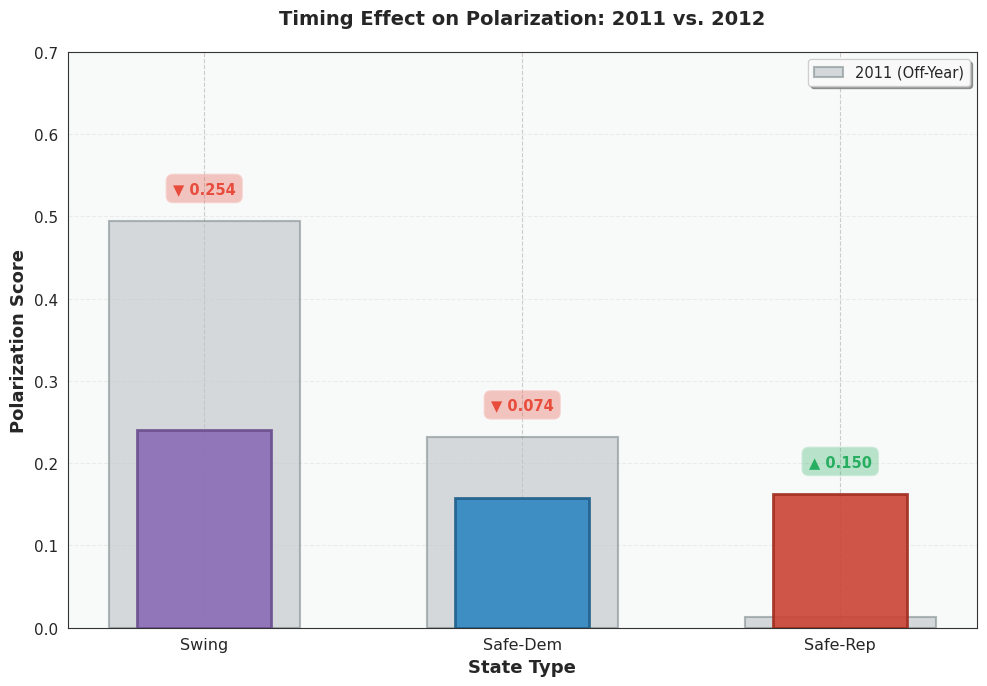

✓ Option 4 CLEAN saved: 2012_Timing_Option4_Clean.png


In [ ]:
# ============================================================================
# CELL 2: 2012 TIMING VISUALIZATION - OVERLAY STYLE
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Set enhanced style
sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.edgecolor': '.2',
    'axes.linewidth': 1.2
})

# Enhanced font settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 10.5
plt.rcParams['legend.framealpha'] = 0.95

# Define state colors
STATE_COLORS = {
    'Swing': '#8B6BB7',      # Rich purple
    'Safe-Dem': '#2E86C1',   # Deep blue
    'Safe-Rep': '#CB4335'    # Rich red
}

print("\nPreparing 2012 timing visualization...")

# Prepare data from timing_df_2012
state_order = ['Swing', 'Safe-Dem', 'Safe-Rep']
data_2011 = []
data_2012 = []

for state in state_order:
    val_2011 = timing_df_2012[(timing_df_2012['State Type']==state) &
                              (timing_df_2012['Time Period']=='2011 (Off-Year)')]['Polarization'].values[0]
    val_2012 = timing_df_2012[(timing_df_2012['State Type']==state) &
                              (timing_df_2012['Time Period']=='2012 (Election Year)')]['Polarization'].values[0]
    data_2011.append(val_2011)
    data_2012.append(val_2012)

changes = [data_2012[i] - data_2011[i] for i in range(len(state_order))]

# ============================================================================
# Overlay bars WITH FIXED EDGE COLORS
# ============================================================================

print("\n: Overlay bars (fixed edge colors)...")

fig4, ax4 = plt.subplots(figsize=(10, 7))

x_pos = np.arange(len(state_order))
width = 0.6

# Draw BASE bars (2011 values) in grey - wider
bars_base = ax4.bar(x_pos, data_2011, width,
                    label='2011 Baseline',
                    color='#BDC3C7', alpha=0.6,
                    edgecolor='#7F8C8D', linewidth=1.5)

# Draw OVERLAY bars (2012 values) in state colors with darker matching edges
bars_overlay = []
for i, state in enumerate(state_order):
    # Create darker version of state color for edge
    if state == 'Swing':
        edge_color = '#6B4E8F'  # Darker purple
    elif state == 'Safe-Dem':
        edge_color = '#1F5F8B'  # Darker blue
    else:  # Safe-Rep
        edge_color = '#A12D1F'  # Darker red

    bar = ax4.bar(i, data_2012[i], width * 0.7,
                  color=STATE_COLORS[state],
                  alpha=0.9, edgecolor=edge_color, linewidth=2)
    bars_overlay.append(bar)

# ONLY add change indicators at the top
for i, (change, state) in enumerate(zip(changes, state_order)):
    arrow = '▼' if change < 0 else '▲'
    change_color = '#E74C3C' if change < 0 else '#27AE60'

    y_pos = max(data_2011[i], data_2012[i]) + 0.03

    bbox_props = dict(boxstyle='round,pad=0.5', facecolor=change_color,
                     edgecolor='white', alpha=0.3, linewidth=1.5)
    ax4.text(i, y_pos, f'{arrow} {abs(change):.3f}',
            ha='center', va='bottom', fontsize=10.5,
            fontweight='bold', color=change_color, bbox=bbox_props)

ax4.set_xlabel('State Type', fontweight='bold', fontsize=13)
ax4.set_ylabel('Polarization Score', fontweight='bold', fontsize=13)
ax4.set_title('Timing Effect on Polarization: 2011 vs. 2012',
              fontweight='bold', pad=20, fontsize=14)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(state_order, fontsize=11.5)
ax4.set_ylim(0, 0.7)

# Simple legend - ONLY 2011
legend_elements = [
    Patch(facecolor='#BDC3C7', edgecolor='#7F8C8D',
          linewidth=1.5, label='2011 (Off-Year)', alpha=0.6)
]

legend = ax4.legend(handles=legend_elements,
                   loc='upper right', frameon=True, fancybox=True,
                   shadow=True, fontsize=10.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)

ax4.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax4.set_axisbelow(True)
ax4.set_facecolor('#F8F9F9')

plt.tight_layout()
plt.savefig('2012_Timing_Option4_Clean.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Option 4 CLEAN saved: 2012_Timing_Option4_Clean.png")


### Topic Visualizations


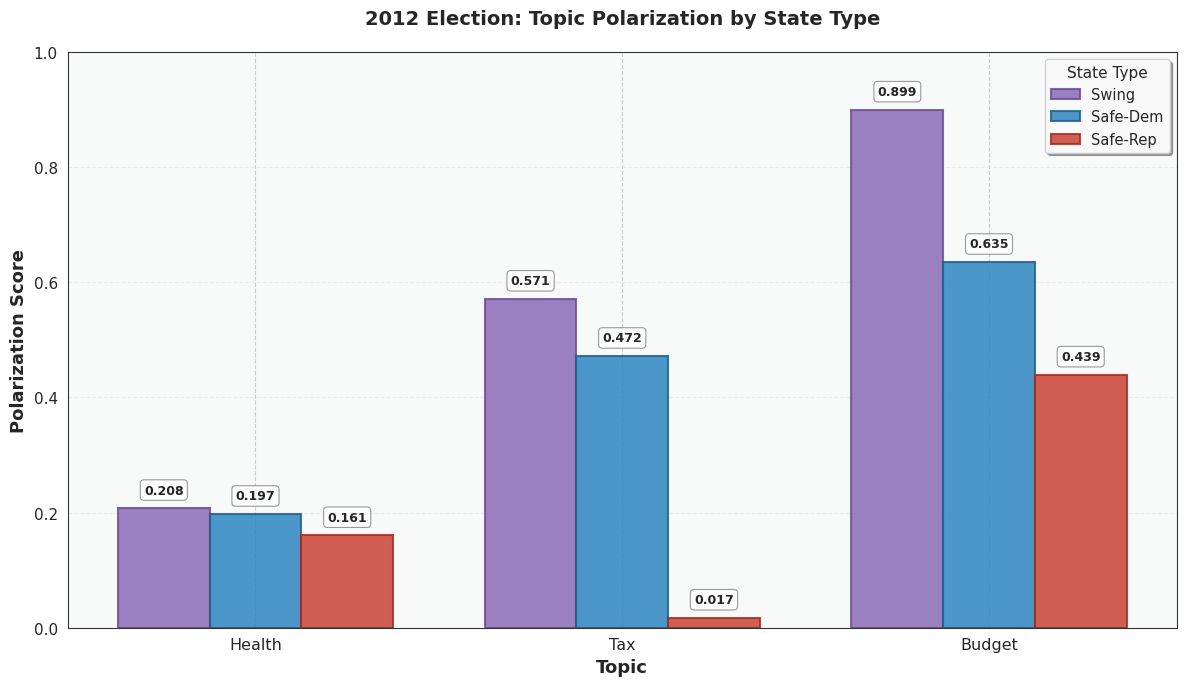

✓ Combined 2012 topic visualization complete!


In [ ]:
# COMBINED TOPIC VISUALIZATION: Topics on X-axis, State Types as bars
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set enhanced style
sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.edgecolor': '.2',
    'axes.linewidth': 1.2
})

# Enhanced font settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 10.5
plt.rcParams['legend.framealpha'] = 0.95

# Define state colors
STATE_COLORS = {
    'Swing': '#8B6BB7',      # Rich purple
    'Safe-Dem': '#2E86C1',   # Deep blue
    'Safe-Rep': '#CB4335'    # Rich red
}

fig, ax = plt.subplots(figsize=(12, 7))

topics = ['Health', 'Tax', 'Budget']
state_order = ['Swing', 'Safe-Dem', 'Safe-Rep']

x = np.arange(len(topics))
width = 0.25

# Get data for all state types
swing_data = [individual_topic_df_2012[(individual_topic_df_2012['Topic']==topic) &
                (individual_topic_df_2012['State Type']=='Swing')]['Polarization'].values[0] for topic in topics]
safed_data = [individual_topic_df_2012[(individual_topic_df_2012['Topic']==topic) &
                (individual_topic_df_2012['State Type']=='Safe-Dem')]['Polarization'].values[0] for topic in topics]
safer_data = [individual_topic_df_2012[(individual_topic_df_2012['Topic']==topic) &
                (individual_topic_df_2012['State Type']=='Safe-Rep')]['Polarization'].values[0] for topic in topics]

# Create bars with state colors and darker edges
bars1 = ax.bar(x - width, swing_data, width, label='Swing',
               color=STATE_COLORS['Swing'], alpha=0.85,
               edgecolor='#6B4E8F', linewidth=1.5)
bars2 = ax.bar(x, safed_data, width, label='Safe-Dem',
               color=STATE_COLORS['Safe-Dem'], alpha=0.85,
               edgecolor='#1F5F8B', linewidth=1.5)
bars3 = ax.bar(x + width, safer_data, width, label='Safe-Rep',
               color=STATE_COLORS['Safe-Rep'], alpha=0.85,
               edgecolor='#A12D1F', linewidth=1.5)

# Add value labels with rounded boxes
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        bbox_props = dict(boxstyle='round,pad=0.3', facecolor='white',
                         edgecolor='gray', alpha=0.8, linewidth=0.8)
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9,
                fontweight='semibold', bbox=bbox_props)

ax.set_xlabel('Topic', fontweight='bold', fontsize=13)
ax.set_ylabel('Polarization Score', fontweight='bold', fontsize=13)
ax.set_title('2012 Election: Topic Polarization by State Type',
             fontweight='bold', pad=20, fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(topics, fontsize=11.5)
ax.set_ylim(0, 1.0)

# Enhanced legend
legend = ax.legend(title='State Type', loc='upper right', frameon=True,
                  fancybox=True, shadow=True, title_fontsize=11, fontsize=10.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)

ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)
ax.set_facecolor('#F8F9F9')

plt.tight_layout()
plt.show()

print("✓ Combined 2012 topic visualization complete!")


# 2020 Election Cycle: Trump vs Biden


## 2020 Analysis


In [ ]:
# ============================================================================
# CELL 3: 2020 TRUMP VS BIDEN ELECTION CYCLE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION: 2020 TRUMP VS BIDEN ELECTION CYCLE")
print("="*80)

# Filter to 2019-2020 period
df_2020 = df_analysis[(df_analysis['year'] >= 2019) & (df_analysis['year'] <= 2020)].copy()

print(f"\nTotal speeches in 2019-2020 period: {len(df_2020)}")
print(f"By state type:\n{df_2020['state_type'].value_counts()}")

# Define campaign-relevant topics for 2020 (LABOR EXCLUDED)
CAMPAIGN_TOPICS_2020 = ['health', 'justice', 'minorities']

# Filter to only analyzed topics
df_2020_topics = df_2020[df_2020[TOPIC_COL].isin(CAMPAIGN_TOPICS_2020)].copy()

print(f"\nSpeeches on analyzed topics (Health, Justice, Minorities): {len(df_2020_topics)}")
print(f"\nTopic breakdown:")
print(df_2020_topics[TOPIC_COL].value_counts().to_string())

# --- PART A: ELECTION TIMING EFFECT ---

print("\n### PART A: ELECTION TIMING EFFECT ###")

# Define time periods: full years
df_2020_topics['time_period'] = 'Other'
df_2020_topics.loc[df_2020_topics['year'] == 2019, 'time_period'] = '2019 (Off-Year)'
df_2020_topics.loc[df_2020_topics['year'] == 2020, 'time_period'] = '2020 (Election Year)'

# Calculate polarization by state type and time period
timing_results_2020 = []

for time_period in ['2019 (Off-Year)', '2020 (Election Year)']:
    df_period = df_2020_topics[df_2020_topics['time_period'] == time_period]

    for state_type in ['Swing', 'Safe-Dem', 'Safe-Rep']:
        df_subset = df_period[df_period['state_type'] == state_type]

        if len(df_subset) > 0:
            party_means = df_subset.groupby(PARTY_COL)[SENTIMENT_COL].mean()

            if 'Democratic' in party_means and 'Republican' in party_means:
                dem_sent = party_means['Democratic']
                rep_sent = party_means['Republican']
                polarization = abs(dem_sent - rep_sent)

                timing_results_2020.append({
                    'Time Period': time_period,
                    'State Type': state_type,
                    'Dem Sentiment': dem_sent,
                    'Rep Sentiment': rep_sent,
                    'Polarization': polarization,
                    'N': len(df_subset)
                })

timing_df_2020 = pd.DataFrame(timing_results_2020)

print("\nPolarization by State Type and Time Period:")
print(timing_df_2020.pivot_table(values='Polarization', index='State Type', columns='Time Period'))

print("\nDetailed Timing Results:")
print(timing_df_2020.to_string(index=False))

# --- PART B: INDIVIDUAL TOPIC BREAKDOWN (CAMPAIGN PERIOD ONLY) ---

print("\n### PART B: INDIVIDUAL TOPIC BREAKDOWN ###")
print("(Analysis restricted to active campaign period: 2019 Q2-Q4 and 2020 Q1-Q3)")

# Ensure DATE_COL is datetime type
df_2020_topics[DATE_COL] = pd.to_datetime(df_2020_topics[DATE_COL], errors='coerce')

# Filter to campaign-active period only: Q2-Q4 of 2019, Q1-Q3 of 2020
df_2020_campaign = df_2020_topics[
    ((df_2020_topics['year'] == 2019) & (df_2020_topics[DATE_COL].dt.quarter.isin([2, 3, 4]))) |
    ((df_2020_topics['year'] == 2020) & (df_2020_topics[DATE_COL].dt.quarter.isin([1, 2, 3])))
].copy()

print(f"\nSpeeches in campaign-active period: {len(df_2020_campaign)}")
print("\nAnalyzed Topics: Health, Justice, Minorities")

# Calculate polarization for each individual topic (using campaign-active data)
individual_topic_results_2020 = []

for topic in CAMPAIGN_TOPICS_2020:
    df_topic = df_2020_campaign[df_2020_campaign[TOPIC_COL] == topic]

    for state_type in ['Swing', 'Safe-Dem', 'Safe-Rep']:
        df_subset = df_topic[df_topic['state_type'] == state_type]

        if len(df_subset) > 0:
            party_means = df_subset.groupby(PARTY_COL)[SENTIMENT_COL].mean()

            if 'Democratic' in party_means and 'Republican' in party_means:
                dem_sent = party_means['Democratic']
                rep_sent = party_means['Republican']
                polarization = abs(dem_sent - rep_sent)

                individual_topic_results_2020.append({
                    'Topic': topic.capitalize(),
                    'State Type': state_type,
                    'Dem Sentiment': dem_sent,
                    'Rep Sentiment': rep_sent,
                    'Polarization': polarization,
                    'N': len(df_subset)
                })

individual_topic_df_2020 = pd.DataFrame(individual_topic_results_2020)

# Display results table
print("\n--- Individual Topic Polarization by State Type ---")
print(individual_topic_df_2020.to_string(index=False))

# Create pivot table
print("\n--- Polarization Scores by Topic and State Type ---")
individual_pivot_2020 = individual_topic_df_2020.pivot_table(
    values='Polarization',
    index='Topic',
    columns='State Type'
)
print(individual_pivot_2020.to_string())

# Sample sizes by topic
print("\n--- Speech Counts by Topic and State Type ---")
sample_pivot_2020 = individual_topic_df_2020.pivot_table(
    values='N',
    index='Topic',
    columns='State Type',
    aggfunc='sum'
)
print(sample_pivot_2020.to_string())

print("\n" + "="*80)
print("2020 ANALYSIS COMPLETE!")
print("="*80)



SECTION: 2020 TRUMP VS BIDEN ELECTION CYCLE

Total speeches in 2019-2020 period: 9847
By state type:
state_type
Safe-Dem    3826
Safe-Rep    3228
Swing       2793
Name: count, dtype: int64

Speeches on analyzed topics (Health, Justice, Minorities): 3031

Topic breakdown:
topic
health        1571
minorities     759
justice        701

### PART A: ELECTION TIMING EFFECT ###

Polarization by State Type and Time Period:
Time Period  2019 (Off-Year)  2020 (Election Year)
State Type                                        
Safe-Dem            0.092202              0.471348
Safe-Rep            0.533148              0.219595
Swing               0.278452              0.313063

Detailed Timing Results:
         Time Period State Type  Dem Sentiment  Rep Sentiment  Polarization   N
     2019 (Off-Year)      Swing       0.471223       0.192771      0.278452 444
     2019 (Off-Year)   Safe-Dem       0.429412       0.337209      0.092202 766
     2019 (Off-Year)   Safe-Rep       0.621951       0.088

## 2020 Visualizations


### Timing Visualization


2020 TIMING VISUALIZATION


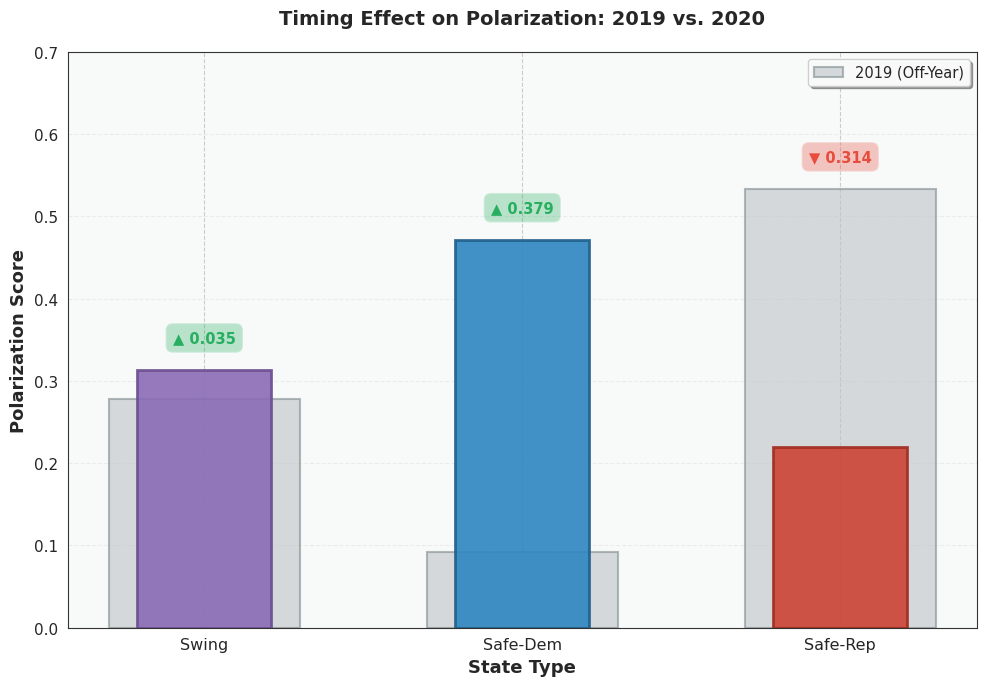

✓ 2020 Timing visualization complete!


In [ ]:
# ============================================================================
# 2020 TIMING VISUALIZATION - OVERLAY STYLE
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set enhanced style
sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.edgecolor': '.2',
    'axes.linewidth': 1.2
})

# Enhanced font settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 10.5
plt.rcParams['legend.framealpha'] = 0.95
plt.rcParams['figure.titlesize'] = 15

# Define enhanced color scheme
STATE_COLORS = {
    'Swing': '#8B6BB7',      # Rich purple
    'Safe-Dem': '#2E86C1',   # Deep blue
    'Safe-Rep': '#CB4335'    # Rich red
}

print("="*80)
print("2020 TIMING VISUALIZATION")
print("="*80)

# Prepare data
state_order = ['Swing', 'Safe-Dem', 'Safe-Rep']
data_2019 = []
data_2020 = []
changes = []

for state in state_order:
    val_2019 = timing_df_2020[(timing_df_2020['State Type']==state) &
                              (timing_df_2020['Time Period']=='2019 (Off-Year)')]['Polarization'].values[0]
    val_2020 = timing_df_2020[(timing_df_2020['State Type']==state) &
                              (timing_df_2020['Time Period']=='2020 (Election Year)')]['Polarization'].values[0]
    data_2019.append(val_2019)
    data_2020.append(val_2020)
    changes.append(val_2020 - val_2019)

# Create figure
fig, ax = plt.subplots(figsize=(10, 7))

x_pos = np.arange(len(state_order))
width = 0.6

# Draw BASE bars (2019 values) in grey - wider
bars_base = ax.bar(x_pos, data_2019, width,
                   color='#BDC3C7', alpha=0.6,
                   edgecolor='#7F8C8D', linewidth=1.5)

# Draw OVERLAY bars (2020 values) in state colors with darker matching edges
bars_overlay = []
for i, state in enumerate(state_order):
    if state == 'Swing':
        edge_color = '#6B4E8F'
    elif state == 'Safe-Dem':
        edge_color = '#1F5F8B'
    else:
        edge_color = '#A12D1F'

    bar = ax.bar(i, data_2020[i], width * 0.7,
                 color=STATE_COLORS[state],
                 alpha=0.9, edgecolor=edge_color, linewidth=2)
    bars_overlay.append(bar)

# Add change indicators
for i, (change, state) in enumerate(zip(changes, state_order)):
    arrow = '▼' if change < 0 else '▲'
    change_color = '#E74C3C' if change < 0 else '#27AE60'

    y_pos = max(data_2019[i], data_2020[i]) + 0.03

    bbox_props = dict(boxstyle='round,pad=0.5', facecolor=change_color,
                     edgecolor='white', alpha=0.3, linewidth=1.5)
    ax.text(i, y_pos, f'{arrow} {abs(change):.3f}',
            ha='center', va='bottom', fontsize=10.5,
            fontweight='bold', color=change_color, bbox=bbox_props)

ax.set_xlabel('State Type', fontweight='bold', fontsize=13)
ax.set_ylabel('Polarization Score', fontweight='bold', fontsize=13)
ax.set_title('Timing Effect on Polarization: 2019 vs. 2020',
             fontweight='bold', pad=20, fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(state_order, fontsize=11.5)
ax.set_ylim(0, 0.7)

# Simple legend - ONLY 2019
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#BDC3C7', edgecolor='#7F8C8D',
          linewidth=1.5, label='2019 (Off-Year)', alpha=0.6)
]

legend = ax.legend(handles=legend_elements,
                  loc='upper right', frameon=True, fancybox=True,
                  shadow=True, fontsize=10.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)

ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)
ax.set_facecolor('#F8F9F9')

plt.tight_layout()
plt.show()

print("✓ 2020 Timing visualization complete!")


### Topic Visualizations


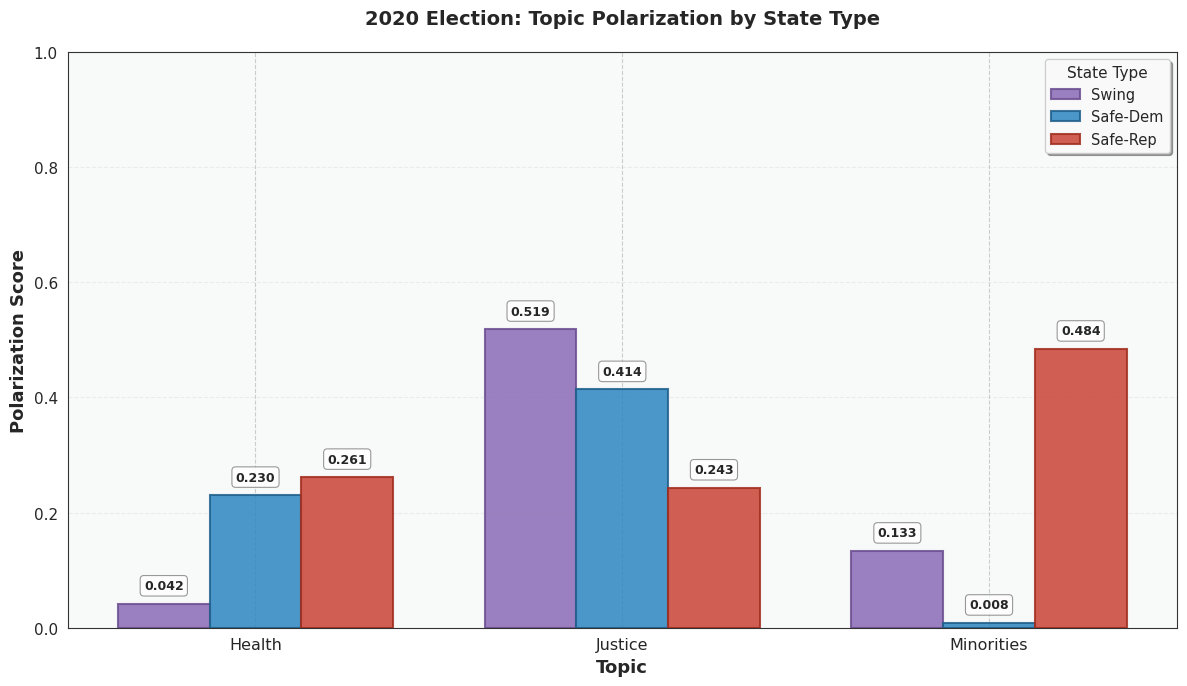

✓ Combined 2020 topic visualization complete!


In [ ]:
# COMBINED TOPIC VISUALIZATION FOR 2020: Topics on X-axis, State Types as bars
fig, ax = plt.subplots(figsize=(12, 7))

topics_2020 = ['Health', 'Justice', 'Minorities']
state_order = ['Swing', 'Safe-Dem', 'Safe-Rep']

x = np.arange(len(topics_2020))
width = 0.25

# Get data for all state types
swing_data = [individual_topic_df_2020[(individual_topic_df_2020['Topic']==topic) &
                (individual_topic_df_2020['State Type']=='Swing')]['Polarization'].values[0] for topic in topics_2020]
safed_data = [individual_topic_df_2020[(individual_topic_df_2020['Topic']==topic) &
                (individual_topic_df_2020['State Type']=='Safe-Dem')]['Polarization'].values[0] for topic in topics_2020]
safer_data = [individual_topic_df_2020[(individual_topic_df_2020['Topic']==topic) &
                (individual_topic_df_2020['State Type']=='Safe-Rep')]['Polarization'].values[0] for topic in topics_2020]

# Create bars with state colors and darker edges
bars1 = ax.bar(x - width, swing_data, width, label='Swing',
               color=STATE_COLORS['Swing'], alpha=0.85,
               edgecolor='#6B4E8F', linewidth=1.5)
bars2 = ax.bar(x, safed_data, width, label='Safe-Dem',
               color=STATE_COLORS['Safe-Dem'], alpha=0.85,
               edgecolor='#1F5F8B', linewidth=1.5)
bars3 = ax.bar(x + width, safer_data, width, label='Safe-Rep',
               color=STATE_COLORS['Safe-Rep'], alpha=0.85,
               edgecolor='#A12D1F', linewidth=1.5)

# Add value labels with rounded boxes
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        bbox_props = dict(boxstyle='round,pad=0.3', facecolor='white',
                         edgecolor='gray', alpha=0.8, linewidth=0.8)
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9,
                fontweight='semibold', bbox=bbox_props)

ax.set_xlabel('Topic', fontweight='bold', fontsize=13)
ax.set_ylabel('Polarization Score', fontweight='bold', fontsize=13)
ax.set_title('2020 Election: Topic Polarization by State Type',
             fontweight='bold', pad=20, fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(topics_2020, fontsize=11.5)
ax.set_ylim(0, 1.0)

# Enhanced legend
legend = ax.legend(title='State Type', loc='upper right', frameon=True,
                  fancybox=True, shadow=True, title_fontsize=11, fontsize=10.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)

ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)
ax.set_facecolor('#F8F9F9')

plt.tight_layout()
plt.show()

print("✓ Combined 2020 topic visualization complete!")


# Experimental Design & Results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("COMPREHENSIVE DATASET OVERVIEW - APPENDIX MATERIALS")
print("="*80)

# ============================================================================
# SECTION 1: COMPLETE TOPIC DISTRIBUTION
# ============================================================================
print("\n" + "="*80)
print("SECTION 1: COMPLETE TOPIC DISTRIBUTION ACROSS ALL ELECTIONS")
print("="*80)

# Full topic distribution for 2012
print("\n--- 2012 ELECTION CYCLE (All Topics) ---")
df_2012 = df_analysis[(df_analysis['year'] >= 2011) & (df_analysis['year'] <= 2012)].copy()
topic_dist_2012 = df_2012[TOPIC_COL].value_counts().sort_values(ascending=False)
topic_pct_2012 = (topic_dist_2012 / len(df_2012) * 100).round(2)

topic_summary_2012 = pd.DataFrame({
    'Topic': topic_dist_2012.index,
    'Speech Count': topic_dist_2012.values,
    'Percentage': topic_pct_2012.values,
    'Selected for RQ2': topic_dist_2012.index.isin(['health', 'tax', 'budget'])
})
print(topic_summary_2012.to_string(index=False))
print(f"\nTotal topics in 2012: {len(topic_dist_2012)}")
print(f"Analyzed topics: 3 (health, tax, budget)")
print(f"Coverage of analyzed topics: {topic_pct_2012[['health', 'tax', 'budget']].sum():.2f}%")

# Full topic distribution for 2020
print("\n--- 2020 ELECTION CYCLE (All Topics) ---")
df_2020 = df_analysis[(df_analysis['year'] >= 2019) & (df_analysis['year'] <= 2020)].copy()
topic_dist_2020 = df_2020[TOPIC_COL].value_counts().sort_values(ascending=False)
topic_pct_2020 = (topic_dist_2020 / len(df_2020) * 100).round(2)

topic_summary_2020 = pd.DataFrame({
    'Topic': topic_dist_2020.index,
    'Speech Count': topic_dist_2020.values,
    'Percentage': topic_pct_2020.values,
    'Selected for RQ2': topic_dist_2020.index.isin(['health', 'justice', 'minorities'])
})
print(topic_summary_2020.to_string(index=False))
print(f"\nTotal topics in 2020: {len(topic_dist_2020)}")
print(f"Analyzed topics: 3 (health, justice, minorities)")
print(f"Coverage of analyzed topics: {topic_pct_2020[['health', 'justice', 'minorities']].sum():.2f}%")

# ============================================================================
# SECTION 2: STATE-LEVEL BREAKDOWN (Individual States)
# ============================================================================
print("\n" + "="*80)
print("SECTION 2: INDIVIDUAL STATE ANALYSIS")
print("="*80)

# State classifications (from your methodology)
safe_dem_states = ['CA', 'NY', 'IL', 'NJ', 'MA']
safe_rep_states = ['TX', 'IN', 'TN', 'SC', 'MO', 'LA', 'KY', 'AL', 'MS', 'AR', 'KS']
swing_states = ['FL', 'OH', 'PA', 'MI', 'GA', 'VA']

print("\n--- Speech Distribution by Individual State ---")
state_speech_counts = df_analysis[STATE_COL].value_counts()
state_breakdown = pd.DataFrame({
    'State': state_speech_counts.index,
    'Total Speeches': state_speech_counts.values,
    'Percentage': (state_speech_counts / len(df_analysis) * 100).round(2)
})

# Add state type classification
def classify_state_abbrev(state_abbrev):
    if state_abbrev in safe_dem_states:
        return 'Safe-Dem'
    elif state_abbrev in safe_rep_states:
        return 'Safe-Rep'
    elif state_abbrev in swing_states:
        return 'Swing'
    else:
        return 'Other'

state_breakdown['State Type'] = state_breakdown['State'].apply(classify_state_abbrev)
state_breakdown = state_breakdown.sort_values('Total Speeches', ascending=False)
print(state_breakdown.to_string(index=False))

# ============================================================================
# SECTION 3: POLARIZATION ACROSS ALL TOPICS
# ============================================================================
print("\n" + "="*80)
print("SECTION 3: POLARIZATION SCORES FOR ALL TOPICS")
print("="*80)

# Function to calculate polarization for any topic
def calculate_polarization_all_topics(df_subset, election_year):
    """Calculate polarization for all topics in the dataset"""
    results = []

    for topic in df_subset[TOPIC_COL].unique():
        topic_data = df_subset[df_subset[TOPIC_COL] == topic]

        for state_type in ['Swing', 'Safe-Dem', 'Safe-Rep']:
            state_data = topic_data[topic_data['state_type'] == state_type]

            if len(state_data) > 0:
                party_means = state_data.groupby(PARTY_COL)[SENTIMENT_COL].mean()

                if 'Democratic' in party_means.index and 'Republican' in party_means.index:
                    dem_sentiment = party_means['Democratic']
                    rep_sentiment = party_means['Republican']
                    polarization = abs(dem_sentiment - rep_sentiment)
                    n = len(state_data)

                    results.append({
                        'Election': election_year,
                        'Topic': topic,
                        'State Type': state_type,
                        'Dem Sentiment': dem_sentiment,
                        'Rep Sentiment': rep_sentiment,
                        'Polarization': polarization,
                        'N': n
                    })

    return pd.DataFrame(results)

# Calculate for 2012 (campaign period - using date-based filtering)
print("\nCalculating polarization for 2012 topics...")
df_2012[DATE_COL] = pd.to_datetime(df_2012[DATE_COL], errors='coerce')
df_2012['quarter'] = df_2012[DATE_COL].dt.quarter

df_2012_campaign = df_2012[
    ((df_2012['year'] == 2011) & (df_2012['quarter'].isin([2, 3, 4]))) |
    ((df_2012['year'] == 2012) & (df_2012['quarter'].isin([1, 2, 3])))
].copy()
all_topics_2012 = calculate_polarization_all_topics(df_2012_campaign, '2012')

print("\n--- 2012: Top 10 Most Polarizing Topics (by average polarization) ---")
topic_avg_2012 = all_topics_2012.groupby('Topic')['Polarization'].mean().sort_values(ascending=False)
print(topic_avg_2012.head(10))

# Calculate for 2020 (campaign period)
print("\nCalculating polarization for 2020 topics...")
df_2020[DATE_COL] = pd.to_datetime(df_2020[DATE_COL], errors='coerce')
df_2020['quarter'] = df_2020[DATE_COL].dt.quarter

df_2020_campaign = df_2020[
    ((df_2020['year'] == 2019) & (df_2020['quarter'].isin([2, 3, 4]))) |
    ((df_2020['year'] == 2020) & (df_2020['quarter'].isin([1, 2, 3])))
].copy()
all_topics_2020 = calculate_polarization_all_topics(df_2020_campaign, '2020')

print("\n--- 2020: Top 10 Most Polarizing Topics (by average polarization) ---")
topic_avg_2020 = all_topics_2020.groupby('Topic')['Polarization'].mean().sort_values(ascending=False)
print(topic_avg_2020.head(10))

# ============================================================================
# SECTION 4: TOPICS NOT ANALYZED IN RQ2
# ============================================================================
print("\n" + "="*80)
print("SECTION 4: MAJOR TOPICS EXCLUDED FROM RQ2 ANALYSIS")
print("="*80)

print("\n--- 2012: Top 5 Excluded Topics ---")
excluded_2012 = topic_summary_2012[~topic_summary_2012['Selected for RQ2']].head(5)
print(excluded_2012[['Topic', 'Speech Count', 'Percentage']].to_string(index=False))

print("\n--- 2020: Top 5 Excluded Topics ---")
excluded_2020 = topic_summary_2020[~topic_summary_2020['Selected for RQ2']].head(5)
print(excluded_2020[['Topic', 'Speech Count', 'Percentage']].to_string(index=False))

# ============================================================================
# SECTION 5: ROBUSTNESS CHECK - NEXT MOST SALIENT TOPICS
# ============================================================================
print("\n" + "="*80)
print("SECTION 5: ROBUSTNESS CHECK - POLARIZATION OF NEXT MOST SALIENT TOPICS")
print("="*80)

# Get 4th, 5th, 6th most common topics for each election
print("\n--- 2012: Polarization of 4th-6th Most Common Topics ---")
next_topics_2012 = topic_dist_2012.iloc[3:6].index
for topic in next_topics_2012:
    topic_pol = all_topics_2012[all_topics_2012['Topic'] == topic]
    if len(topic_pol) > 0:
        avg_pol = topic_pol['Polarization'].mean()
        total_speeches = topic_pol['N'].sum()
        print(f"\n{topic.upper()}:")
        print(f"  Average Polarization: {avg_pol:.3f}")
        print(f"  Total Speeches: {int(total_speeches)}")
        print(topic_pol[['State Type', 'Polarization', 'N']].to_string(index=False))

print("\n--- 2020: Polarization of 4th-6th Most Common Topics ---")
next_topics_2020 = topic_dist_2020.iloc[3:6].index
for topic in next_topics_2020:
    topic_pol = all_topics_2020[all_topics_2020['Topic'] == topic]
    if len(topic_pol) > 0:
        avg_pol = topic_pol['Polarization'].mean()
        total_speeches = topic_pol['N'].sum()
        print(f"\n{topic.upper()}:")
        print(f"  Average Polarization: {avg_pol:.3f}")
        print(f"  Total Speeches: {int(total_speeches)}")
        print(topic_pol[['State Type', 'Polarization', 'N']].to_string(index=False))

# ============================================================================
# SECTION 6: PARTY-SPECIFIC TOPIC PREFERENCES
# ============================================================================
print("\n" + "="*80)
print("SECTION 6: PARTY-SPECIFIC TOPIC PREFERENCES")
print("="*80)

print("\n--- 2012: Topic Distribution by Party ---")
party_topics_2012 = df_2012_campaign.groupby([PARTY_COL, TOPIC_COL]).size().reset_index(name='count')
party_topics_2012_wide = party_topics_2012.pivot(index=TOPIC_COL, columns=PARTY_COL, values='count').fillna(0)
party_topics_2012_wide['Dem %'] = (party_topics_2012_wide['Democratic'] / party_topics_2012_wide['Democratic'].sum() * 100).round(2)
party_topics_2012_wide['Rep %'] = (party_topics_2012_wide['Republican'] / party_topics_2012_wide['Republican'].sum() * 100).round(2)
party_topics_2012_wide['Difference'] = (party_topics_2012_wide['Dem %'] - party_topics_2012_wide['Rep %']).round(2)
print(party_topics_2012_wide.sort_values('Difference', ascending=False, key=abs).head(10))

print("\n--- 2020: Topic Distribution by Party ---")
party_topics_2020 = df_2020_campaign.groupby([PARTY_COL, TOPIC_COL]).size().reset_index(name='count')
party_topics_2020_wide = party_topics_2020.pivot(index=TOPIC_COL, columns=PARTY_COL, values='count').fillna(0)
party_topics_2020_wide['Dem %'] = (party_topics_2020_wide['Democratic'] / party_topics_2020_wide['Democratic'].sum() * 100).round(2)
party_topics_2020_wide['Rep %'] = (party_topics_2020_wide['Republican'] / party_topics_2020_wide['Republican'].sum() * 100).round(2)
party_topics_2020_wide['Difference'] = (party_topics_2020_wide['Dem %'] - party_topics_2020_wide['Rep %']).round(2)
print(party_topics_2020_wide.sort_values('Difference', ascending=False, key=abs).head(10))

print("\n" + "="*80)
print("APPENDIX OVERVIEW COMPLETE!")
print("="*80)


COMPREHENSIVE DATASET OVERVIEW - APPENDIX MATERIALS

SECTION 1: COMPLETE TOPIC DISTRIBUTION ACROSS ALL ELECTIONS

--- 2012 ELECTION CYCLE (All Topics) ---
      Topic  Speech Count  Percentage  Selected for RQ2
     health          2809       24.34              True
      labor          1384       11.99             False
        tax          1024        8.87              True
    justice           790        6.84             False
   business           749        6.49             False
     budget           697        6.04              True
 federalism           696        6.03             False
    defense           663        5.74             False
    foreign           577        5.00             False
  education           493        4.27             False
 minorities           376        3.26             False
 government           295        2.56             False
      trade           262        2.27             False
      money           184        1.59             False
  ele


Creating Appendix A: Topic Coverage Pie Charts...


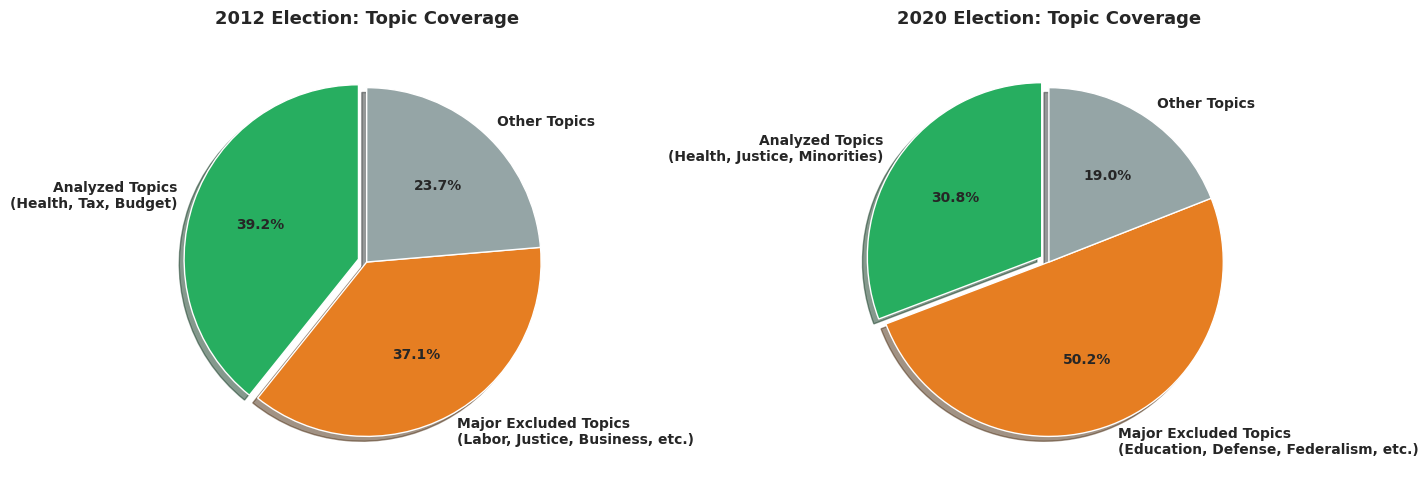

✓ Saved: Appendix_A_Topic_Coverage.png

Creating Appendix B: Robustness Check - 2012 Alternative Topics...


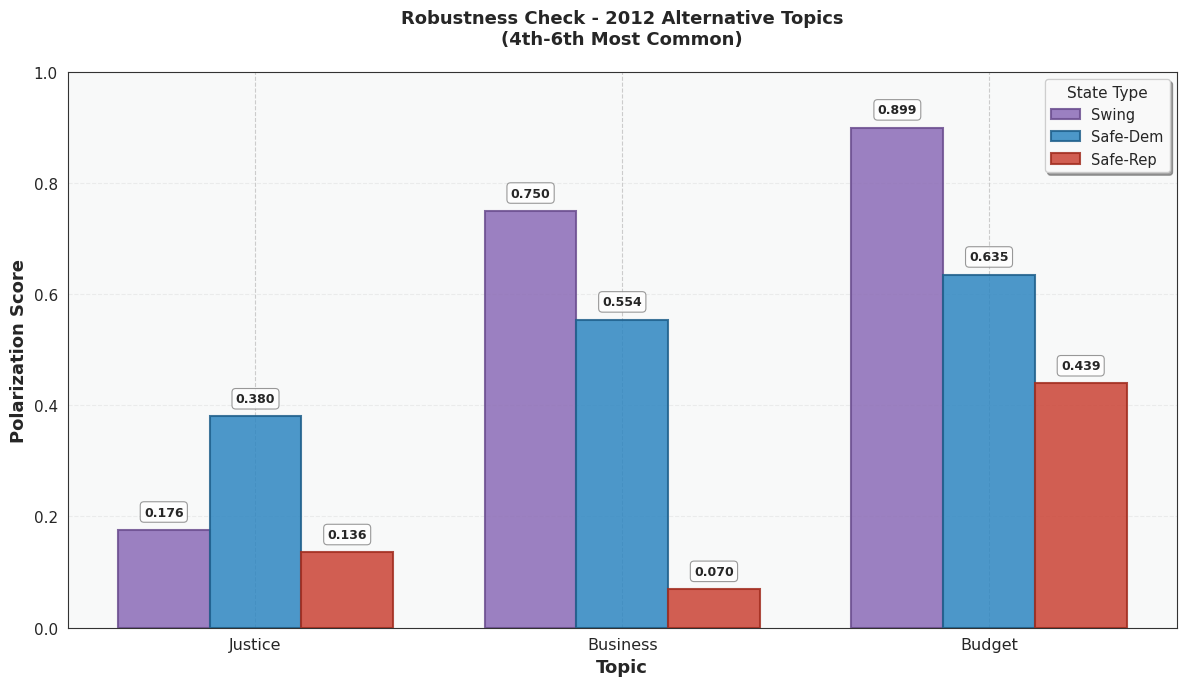

✓ Saved: Appendix_B_Robustness_2012.png

Creating Appendix C: Robustness Check - 2020 Alternative Topics...


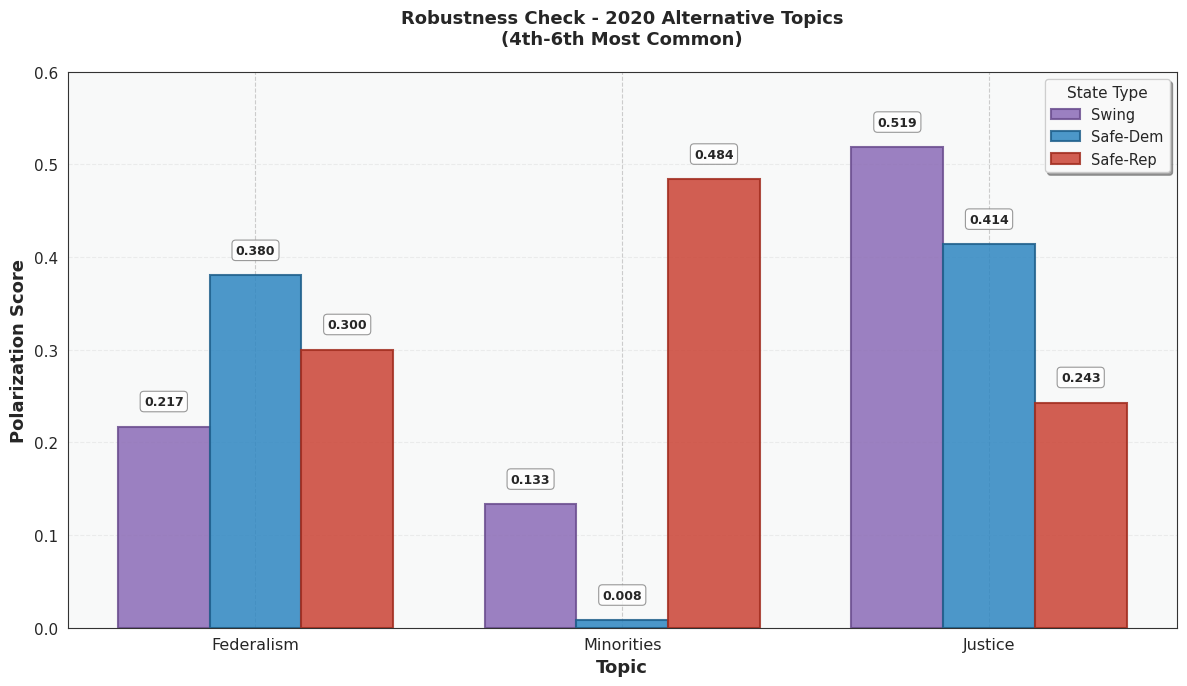

✓ Saved: Appendix_C_Robustness_2020.png

Creating Appendix D: Party Topic Preferences Heatmap - 2012...


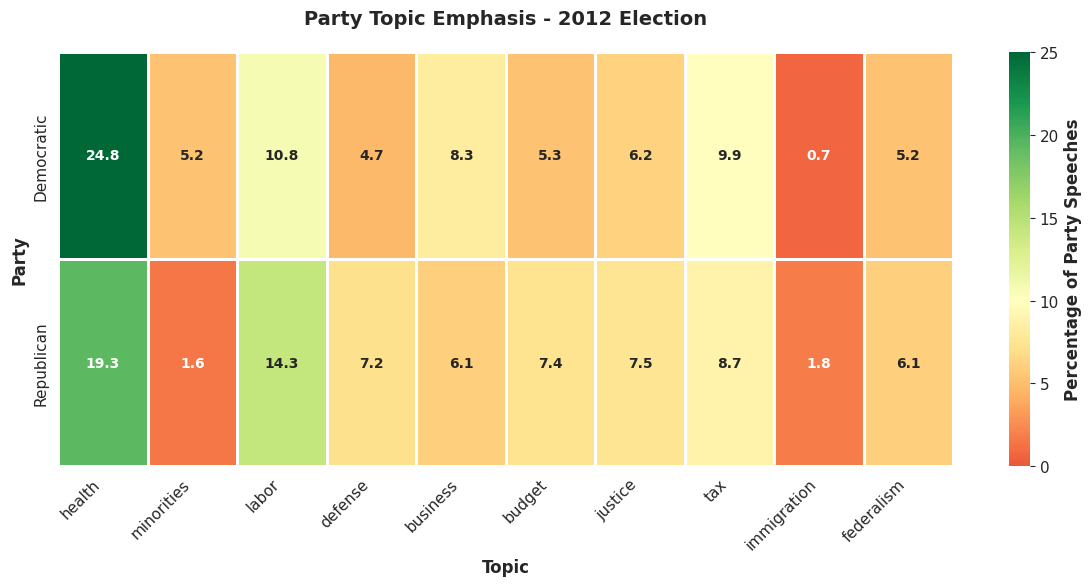

✓ Saved: Appendix_D_Party_Preferences_2012.png

Creating Appendix E: Party Topic Preferences Heatmap - 2020...


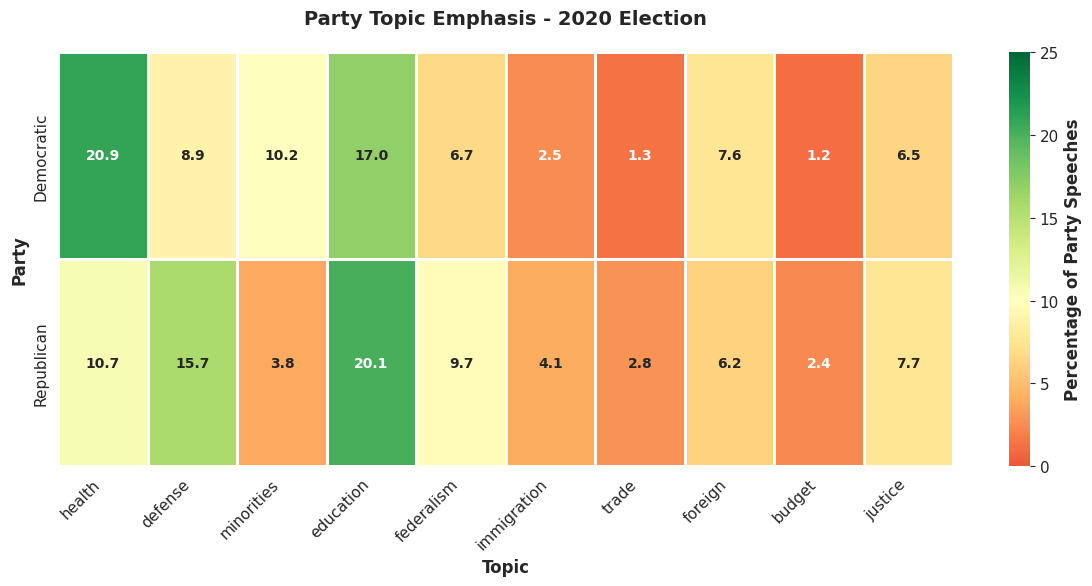

✓ Saved: Appendix_E_Party_Preferences_2020.png

Creating Appendix F: Party Topic Difference Bar Charts...


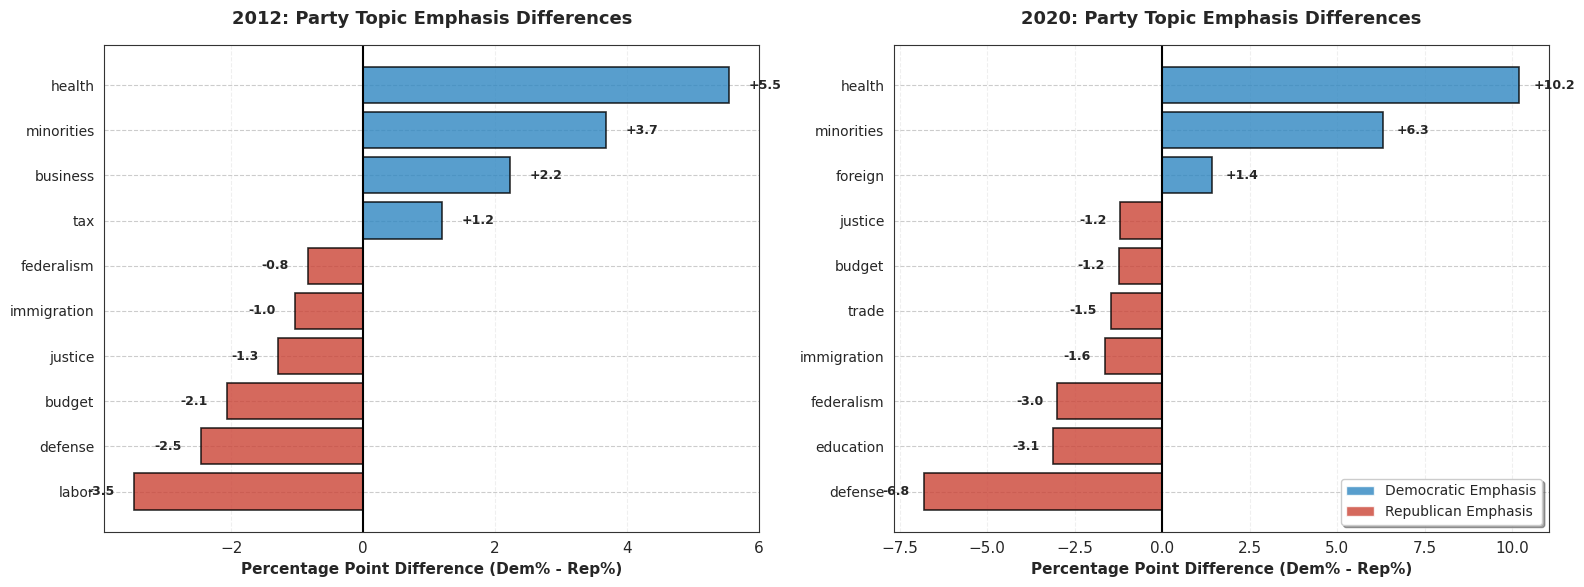

✓ Saved: Appendix_F_Party_Differences.png

APPENDIX VISUALIZATIONS COMPLETE!

Generated files:
  - Appendix_A_Topic_Coverage.png
  - Appendix_B_Robustness_2012.png
  - Appendix_C_Robustness_2020.png
  - Appendix_D_Party_Preferences_2012.png
  - Appendix_E_Party_Preferences_2020.png
  - Appendix_F_Party_Differences.png



In [ ]:
"""
================================================================================
APPENDIX VISUALIZATIONS AND TABLES
================================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.edgecolor': '.2',
    'axes.linewidth': 1.2
})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# ============================================================================
# TOPIC COVERAGE PIE CHARTS
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 2012 Pie Chart
analyzed_2012 = topic_summary_2012[topic_summary_2012['Selected for RQ2']]['Speech Count'].sum()
top_excluded_2012 = topic_summary_2012[~topic_summary_2012['Selected for RQ2']].head(5)['Speech Count'].sum()
other_2012 = topic_summary_2012[~topic_summary_2012['Selected for RQ2']].iloc[5:]['Speech Count'].sum()

sizes_2012 = [analyzed_2012, top_excluded_2012, other_2012]
labels_2012 = ['Analyzed Topics\n(Health, Tax, Budget)',
               'Major Excluded Topics\n(Labor, Justice, Business, etc.)',
               'Other Topics']
colors_2012 = ['#27AE60', '#E67E22', '#95A5A6']
explode_2012 = (0.05, 0, 0)

axes[0].pie(sizes_2012, explode=explode_2012, labels=labels_2012, colors=colors_2012,
            autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 10, 'weight': 'bold'})
axes[0].set_title('2012 Election: Topic Coverage', fontweight='bold', fontsize=13, pad=15)

# 2020 Pie Chart
analyzed_2020 = topic_summary_2020[topic_summary_2020['Selected for RQ2']]['Speech Count'].sum()
top_excluded_2020 = topic_summary_2020[~topic_summary_2020['Selected for RQ2']].head(5)['Speech Count'].sum()
other_2020 = topic_summary_2020[~topic_summary_2020['Selected for RQ2']].iloc[5:]['Speech Count'].sum()

sizes_2020 = [analyzed_2020, top_excluded_2020, other_2020]
labels_2020 = ['Analyzed Topics\n(Health, Justice, Minorities)',
               'Major Excluded Topics\n(Education, Defense, Federalism, etc.)',
               'Other Topics']
colors_2020 = ['#27AE60', '#E67E22', '#95A5A6']
explode_2020 = (0.05, 0, 0)

axes[1].pie(sizes_2020, explode=explode_2020, labels=labels_2020, colors=colors_2020,
            autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 10, 'weight': 'bold'})
axes[1].set_title('2020 Election: Topic Coverage', fontweight='bold', fontsize=13, pad=15)

plt.tight_layout()
plt.savefig('Appendix_A_Topic_Coverage.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✓ Saved: Appendix_A_Topic_Coverage.png")

# ============================================================================
# ROBUSTNESS CHECK - ALTERNATIVE TOPICS (2012)
# ============================================================================

STATE_COLORS = {
    'Swing': '#8B6BB7',
    'Safe-Dem': '#2E86C1',
    'Safe-Rep': '#CB4335'
}

fig, ax = plt.subplots(figsize=(12, 7))

# Get 4th, 5th, 6th topics: Justice, Business, Budget
alt_topics_2012 = ['justice', 'business', 'budget']
alt_topics_labels = ['Justice', 'Business', 'Budget']
state_order = ['Swing', 'Safe-Dem', 'Safe-Rep']

x = np.arange(len(alt_topics_labels))
width = 0.25

# Get data
swing_data = []
safed_data = []
safer_data = []

for topic in alt_topics_2012:
    topic_data = all_topics_2012[all_topics_2012['Topic'] == topic]

    swing_val = topic_data[topic_data['State Type'] == 'Swing']['Polarization'].values
    swing_data.append(swing_val[0] if len(swing_val) > 0 else 0)

    safed_val = topic_data[topic_data['State Type'] == 'Safe-Dem']['Polarization'].values
    safed_data.append(safed_val[0] if len(safed_val) > 0 else 0)

    safer_val = topic_data[topic_data['State Type'] == 'Safe-Rep']['Polarization'].values
    safer_data.append(safer_val[0] if len(safer_val) > 0 else 0)

# Create bars
bars1 = ax.bar(x - width, swing_data, width, label='Swing',
               color=STATE_COLORS['Swing'], alpha=0.85,
               edgecolor='#6B4E8F', linewidth=1.5)
bars2 = ax.bar(x, safed_data, width, label='Safe-Dem',
               color=STATE_COLORS['Safe-Dem'], alpha=0.85,
               edgecolor='#1F5F8B', linewidth=1.5)
bars3 = ax.bar(x + width, safer_data, width, label='Safe-Rep',
               color=STATE_COLORS['Safe-Rep'], alpha=0.85,
               edgecolor='#A12D1F', linewidth=1.5)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            bbox_props = dict(boxstyle='round,pad=0.3', facecolor='white',
                             edgecolor='gray', alpha=0.8, linewidth=0.8)
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9,
                    fontweight='semibold', bbox=bbox_props)

ax.set_xlabel('Topic', fontweight='bold', fontsize=13)
ax.set_ylabel('Polarization Score', fontweight='bold', fontsize=13)
ax.set_title('Robustness Check - 2012 Alternative Topics\n(4th-6th Most Common)',
             fontweight='bold', pad=20, fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(alt_topics_labels, fontsize=11.5)
ax.set_ylim(0, 1.0)

legend = ax.legend(title='State Type', loc='upper right', frameon=True,
                  fancybox=True, shadow=True, title_fontsize=11, fontsize=10.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)

ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)
ax.set_facecolor('#F8F9F9')

plt.tight_layout()
plt.savefig('Appendix_B_Robustness_2012.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✓ Saved: Appendix_B_Robustness_2012.png")

# ============================================================================
# ROBUSTNESS CHECK - ALTERNATIVE TOPICS (2020)
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 7))

# Get 4th, 5th, 6th topics: Federalism, Minorities, Justice
alt_topics_2020 = ['federalism', 'minorities', 'justice']
alt_topics_labels_2020 = ['Federalism', 'Minorities', 'Justice']

x = np.arange(len(alt_topics_labels_2020))
width = 0.25

# Get data
swing_data = []
safed_data = []
safer_data = []

for topic in alt_topics_2020:
    topic_data = all_topics_2020[all_topics_2020['Topic'] == topic]

    swing_val = topic_data[topic_data['State Type'] == 'Swing']['Polarization'].values
    swing_data.append(swing_val[0] if len(swing_val) > 0 else 0)

    safed_val = topic_data[topic_data['State Type'] == 'Safe-Dem']['Polarization'].values
    safed_data.append(safed_val[0] if len(safed_val) > 0 else 0)

    safer_val = topic_data[topic_data['State Type'] == 'Safe-Rep']['Polarization'].values
    safer_data.append(safer_val[0] if len(safer_val) > 0 else 0)

# Create bars
bars1 = ax.bar(x - width, swing_data, width, label='Swing',
               color=STATE_COLORS['Swing'], alpha=0.85,
               edgecolor='#6B4E8F', linewidth=1.5)
bars2 = ax.bar(x, safed_data, width, label='Safe-Dem',
               color=STATE_COLORS['Safe-Dem'], alpha=0.85,
               edgecolor='#1F5F8B', linewidth=1.5)
bars3 = ax.bar(x + width, safer_data, width, label='Safe-Rep',
               color=STATE_COLORS['Safe-Rep'], alpha=0.85,
               edgecolor='#A12D1F', linewidth=1.5)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            bbox_props = dict(boxstyle='round,pad=0.3', facecolor='white',
                             edgecolor='gray', alpha=0.8, linewidth=0.8)
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9,
                    fontweight='semibold', bbox=bbox_props)

ax.set_xlabel('Topic', fontweight='bold', fontsize=13)
ax.set_ylabel('Polarization Score', fontweight='bold', fontsize=13)
ax.set_title('Robustness Check - 2020 Alternative Topics\n(4th-6th Most Common)',
             fontweight='bold', pad=20, fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(alt_topics_labels_2020, fontsize=11.5)
ax.set_ylim(0, 0.6)

legend = ax.legend(title='State Type', loc='upper right', frameon=True,
                  fancybox=True, shadow=True, title_fontsize=11, fontsize=10.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)

ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)
ax.set_facecolor('#F8F9F9')

plt.tight_layout()
plt.savefig('Appendix_C_Robustness_2020.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✓ Saved: Appendix_C_Robustness_2020.png")

# ============================================================================
# PARTY TOPIC PREFERENCE HEATMAP (2012)
# ============================================================================

# Get top 10 topics by absolute difference
top10_2012 = party_topics_2012_wide.sort_values('Difference', ascending=False, key=abs).head(10)

# Prepare data for heatmap
heatmap_data_2012 = top10_2012[['Dem %', 'Rep %']].T
heatmap_data_2012.index = ['Democratic', 'Republican']

fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(heatmap_data_2012, annot=True, fmt='.1f', cmap='RdYlGn',
            center=10, vmin=0, vmax=25, cbar_kws={'label': 'Percentage of Party Speeches'},
            linewidths=1, linecolor='white', ax=ax, annot_kws={'fontsize': 10, 'weight': 'bold'})

ax.set_title('Party Topic Emphasis - 2012 Election',
             fontweight='bold', fontsize=14, pad=20)
ax.set_xlabel('Topic', fontweight='bold', fontsize=12)
ax.set_ylabel('Party', fontweight='bold', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('Appendix_D_Party_Preferences_2012.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✓ Saved: Appendix_D_Party_Preferences_2012.png")

# ============================================================================
# PARTY TOPIC PREFERENCE HEATMAP (2020)
# ============================================================================

# Get top 10 topics by absolute difference
top10_2020 = party_topics_2020_wide.sort_values('Difference', ascending=False, key=abs).head(10)

# Prepare data for heatmap
heatmap_data_2020 = top10_2020[['Dem %', 'Rep %']].T
heatmap_data_2020.index = ['Democratic', 'Republican']

fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(heatmap_data_2020, annot=True, fmt='.1f', cmap='RdYlGn',
            center=10, vmin=0, vmax=25, cbar_kws={'label': 'Percentage of Party Speeches'},
            linewidths=1, linecolor='white', ax=ax, annot_kws={'fontsize': 10, 'weight': 'bold'})

ax.set_title('Party Topic Emphasis - 2020 Election',
             fontweight='bold', fontsize=14, pad=20)
ax.set_xlabel('Topic', fontweight='bold', fontsize=12)
ax.set_ylabel('Party', fontweight='bold', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('Appendix_E_Party_Preferences_2020.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✓ Saved: Appendix_E_Party_Preferences_2020.png")

# ============================================================================
# PARTY TOPIC DIFFERENCE BAR CHART
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2012
top10_2012_sorted = top10_2012.sort_values('Difference')
colors_2012 = ['#2E86C1' if x > 0 else '#CB4335' for x in top10_2012_sorted['Difference']]

axes[0].barh(range(len(top10_2012_sorted)), top10_2012_sorted['Difference'],
             color=colors_2012, alpha=0.8, edgecolor='black', linewidth=1.2)
axes[0].set_yticks(range(len(top10_2012_sorted)))
axes[0].set_yticklabels(top10_2012_sorted.index, fontsize=10)
axes[0].set_xlabel('Percentage Point Difference (Dem% - Rep%)', fontweight='bold', fontsize=11)
axes[0].set_title('2012: Party Topic Emphasis Differences', fontweight='bold', fontsize=13, pad=15)
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=1.5)
axes[0].grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (topic, row) in enumerate(top10_2012_sorted.iterrows()):
    val = row['Difference']
    x_pos = val + (0.3 if val > 0 else -0.3)
    axes[0].text(x_pos, i, f'{val:+.1f}', ha='left' if val > 0 else 'right',
                va='center', fontsize=9, fontweight='bold')

# 2020
top10_2020_sorted = top10_2020.sort_values('Difference')
colors_2020 = ['#2E86C1' if x > 0 else '#CB4335' for x in top10_2020_sorted['Difference']]

axes[1].barh(range(len(top10_2020_sorted)), top10_2020_sorted['Difference'],
             color=colors_2020, alpha=0.8, edgecolor='black', linewidth=1.2)
axes[1].set_yticks(range(len(top10_2020_sorted)))
axes[1].set_yticklabels(top10_2020_sorted.index, fontsize=10)
axes[1].set_xlabel('Percentage Point Difference (Dem% - Rep%)', fontweight='bold', fontsize=11)
axes[1].set_title('2020: Party Topic Emphasis Differences', fontweight='bold', fontsize=13, pad=15)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1.5)
axes[1].grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (topic, row) in enumerate(top10_2020_sorted.iterrows()):
    val = row['Difference']
    x_pos = val + (0.4 if val > 0 else -0.4)
    axes[1].text(x_pos, i, f'{val:+.1f}', ha='left' if val > 0 else 'right',
                va='center', fontsize=9, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2E86C1', label='Democratic Emphasis', alpha=0.8),
    Patch(facecolor='#CB4335', label='Republican Emphasis', alpha=0.8)
]
axes[1].legend(handles=legend_elements, loc='lower right', fontsize=10, frameon=True, shadow=True)

plt.tight_layout()
plt.savefig('Appendix_F_Party_Differences.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✓ Saved: Appendix_F_Party_Differences.png")

# ============================================================================
# SUMMARY
# ============================================================================

print("\n" + "="*80)
print("APPENDIX VISUALIZATIONS COMPLETE!")
print("="*80)
print("\nGenerated files:")
print("  - Appendix_A_Topic_Coverage.png")
print("  - Appendix_B_Robustness_2012.png")
print("  - Appendix_C_Robustness_2020.png")
print("  - Appendix_D_Party_Preferences_2012.png")
print("  - Appendix_E_Party_Preferences_2020.png")
print("  - Appendix_F_Party_Differences.png")
print("\n" + "="*80)
